In [1]:
import pandas as pd
import numpy as np
movie = pd.read_csv("MovieSummaries/movie.metadata.tsv", delimiter='\t',header=None)
character = pd.read_csv("MovieSummaries/character.metadata.tsv", delimiter='\t',header=None)
movie.columns = ['Wikipedia movie ID','Freebase movie ID','Movie name','Movie release date','Movie box office revenue','Movie runtime','Movie languages','Movie countries','Movie genres']
movie["Movie name"] = movie["Movie name"].str.capitalize()
movie["Movie name"] = movie["Movie name"].str.replace(r'[éè]', 'e', regex=True)
imdb1 = pd.read_csv('title.ratings.tsv', delimiter='\t')
imdb2 = pd.read_csv('title.basics.tsv', delimiter='\t', low_memory=False)

In [2]:
merged_df = pd.merge(imdb1, imdb2, on='tconst', how='inner')

In [6]:
merged_2 = merged_df[(merged_df.titleType == 'movie')|(merged_df.titleType == 'tvMovie')]
merged_3 = merged_2[merged_2['numVotes'] >= 20]
merged_3.loc[:, 'primaryTitle'] = merged_3['primaryTitle'].str.capitalize()

In [2]:
character.columns = ['Wikipedia Movie ID','Freebase Movie ID','Actor DOD','Character Name','Actor DOB','Actor gender','Actor height','Actor ethnicity','Actor Name','Actor age at movie release','Freebase character map1','Freebase character map2','Freebase character map3']

In [13]:
counts = character.groupby('Wikipedia Movie ID').size().reset_index(name='count')
merged_df = pd.merge(counts, movie, left_on='Wikipedia Movie ID', right_on='Wikipedia movie ID' , how='inner').drop('Wikipedia movie ID', axis=1)

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Character count vs. Box Office Revenue')

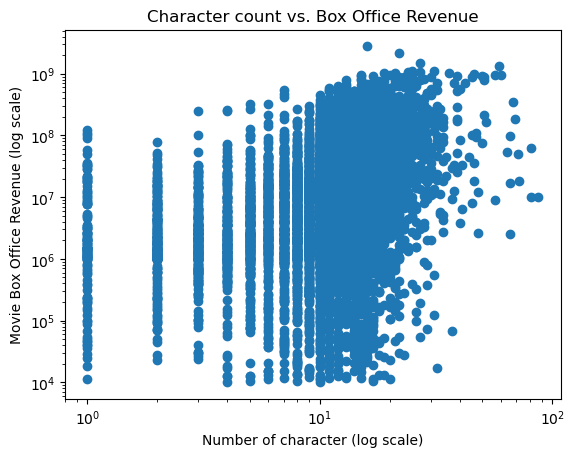

In [20]:
plt.plot(merged_df['count'], merged_df['Movie box office revenue'], 'o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Number of character (log scale)')
plt.ylabel('Movie Box Office Revenue (log scale)')
plt.title('Character count vs. Box Office Revenue')

In [21]:
merged_df

,Wikipedia Movie ID,count,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,330,4,/m/0ktn59,Actrius,1996,NaN,90.0,"{""/m/01m69"": ""Catalan language"", ""/m/06nm1"": ""...","{""/m/06mkj"": ""Spain""}","{""/m/07s9rl0"": ""Drama"", ""/m/01t_vv"": ""Comedy-d..."
1,3217,14,/m/014hr,Army of darkness,1992-10-09,21502796.0,81.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror"", ""/m..."
2,3333,14,/m/0151l,The birth of a nation,1915,50000000.0,190.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/0219x_"": ""Indi..."
3,3746,15,/m/017n9,Blade runner,1982-06-25,33139618.0,116.0,"{""/m/03_9r"": ""Japanese Language"", ""/m/012w70"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/01qpc"": ""Cyberpu..."
4,3837,20,/m/018f8,Blazing saddles,1974-02-07,119500000.0,93.0,"{""/m/0880p"": ""Yiddish Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/0hfjk"": ""Western"", ""/m/06nbt"": ""Satire"", ..."
...,...,...,...,...,...,...,...,...,...,...
64325,37373877,7,/m/02vr316,Crazy eights,2006-10-31,NaN,80.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01q03"": ""Cult"", ""/m/03npn"": ""Horror""}"
64326,37476824,10,/m/09ck55,I love new year,2011,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}","{""/m/03rk0"": ""India""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/016vh2"": ""Ca..."
64327,37478048,4,/m/0g57c0y,Mr. bechara,1996,NaN,NaN,"{""/m/03k50"": ""Hindi Language""}",{},"{""/m/05p553"": ""Comedy film""}"
64328,37492363,3,/m/0ds7zbt,Cherries and clover,2011,NaN,86.0,{},"{""/m/0d060g"": ""Canada""}","{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr..."
